In [2]:


# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base

print(list(Base.classes))

[<class 'sqlalchemy.ext.automap.measurement'>, <class 'sqlalchemy.ext.automap.station'>]


In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement


Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# Find the most recent date in the data set.
query = "SELECT max(date) from measurement"

with engine.connect() as conn:
    print(conn.execute(text(query)).fetchall())

[('2017-08-23',)]


In [10]:
query = """
    SELECT
        date,
        station,
        prcp
    FROM
        measurement
    WHERE
        date >= '2016-08-23'
    ORDER BY
        date ASC;
"""

df = pd.read_sql(text(query), con=engine)
df.print()

AttributeError: 'OptionEngine' object has no attribute 'execute'

In [25]:
# Step 1: Calculate the start date
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = datetime.strptime(most_recent_date, '%Y-%m-%d')
start_date = most_recent_date - timedelta(days=365)

# Step 2: Perform the query
results = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date >= start_date).\
    order_by(Measurement.date.asc()).\
    all()

# Step 3: Save the query results as a Pandas DataFrame
dfb = pd.DataFrame(results, columns=["Date", "Station", "Precipitation"])

# Sort the dataframe by date
dfb["Date"] = pd.to_datetime(dfb['Date'])
dfb = dfb.sort_values(by="Date", ascending=True).reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(dfb['Date'], dfb['Precipitation'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation over the Last 12 Months')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

AttributeError: module 'datetime' has no attribute 'strptime'

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
start_date = datetime.date(2016, 8, 23)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date >= start_date).\
    order_by(Measurement.date.asc()).\
    all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
dfb = pd.DataFrame(results, columns=["Date", "Station", "Precipitation"])

# Sort the dataframe by date
dfb["Date"] = pd.to_datetime(dfb['Date'])
dfb = dfb.sort_values(by="Date", ascending=True).reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
dfb.head()

,Date,Station,Precipitation
0,2016-08-23,USC00519397,0.00
1,2016-08-23,USC00513117,0.15
2,2016-08-23,USC00514830,0.05
3,2016-08-23,USC00517948,NaN
4,2016-08-23,USC00519523,0.02


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
dfb.Precipitation.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
query = "SELECT count(id) from station"

with engine.connect() as conn:
    print(conn.execute(text(query)).fetchall())

[(9,)]


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = """
    SELECT
        station,
        count(*) as num_rows
    FROM
        measurement
    GROUP BY
        station
    ORDER BY
        num_rows desc:
"""

df = pd.read_sql(text(query), con=engine)
df.print()

AttributeError: 'OptionEngine' object has no attribute 'execute'

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """
    SELECT
        min(tobs) as min_temp,
        avg(tobs) as avg_temp,
        max(tobs) as max_temp
    FROM
        measurement
    WHERE
        station = 'USC00519281';
"""

df = pd.read_sql(text(query), con=engine)
df.head()

AttributeError: 'OptionEngine' object has no attribute 'execute'

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = """
    SELECT
        date,
        station,
        tobs
    FROM
        measurement
    WHERE
        date >= '2016-08-23'
        and station = 'USC00519281'
    ORDER BY
        date ASC;
"""

df = pd.read_sql(text(query), con=engine)
df.head()

AttributeError: 'OptionEngine' object has no attribute 'execute'

One year from the last date in the dataset: 2018-08-18


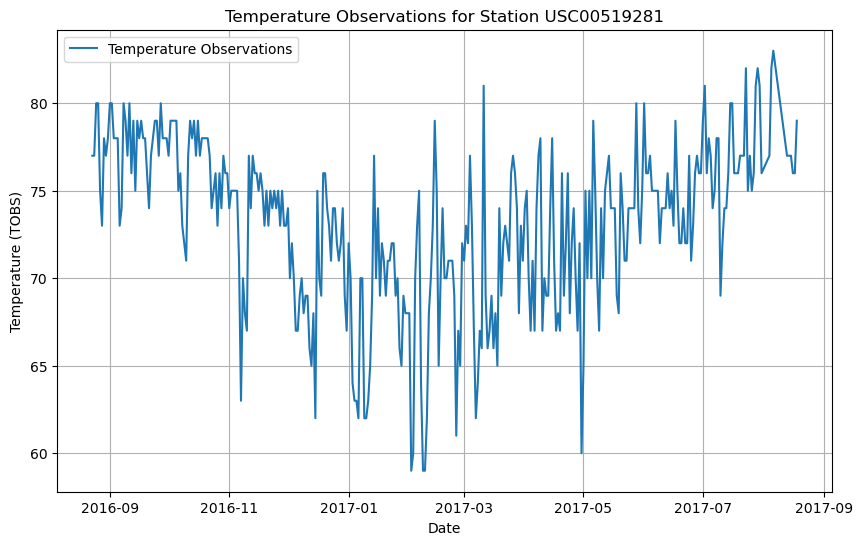

,Date,Station,TOBS
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


In [29]:
# Set the start date
start_date = datetime.date(2016, 8, 23)

# Perform a query to retrieve the data and tobs scores
results = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.asc()).\
    all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
dfa = pd.DataFrame(results, columns=["Date", "Station", "TOBS"])

# Convert 'Date' column to datetime
dfa["Date"] = pd.to_datetime(dfa['Date'])

# Sort the dataframe by date
dfa = dfa.sort_values(by="Date", ascending=True).reset_index(drop=True)

# Calculate the date one year from the last date in the dataset
last_date = dfa["Date"].iloc[-1]
one_year_from_last_date = last_date + pd.DateOffset(years=1)
print(f"One year from the last date in the dataset: {one_year_from_last_date.date()}")

# Set the color for pretty
plot_color = 'teal'  
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(dfa["Date"], dfa["TOBS"], label='Temperature Observations')
plt.xlabel('Date')
plt.ylabel('Temperature (TOBS)')
plt.title('Temperature Observations for Station USC00519281')
plt.legend()
plt.grid(True)
plt.show()

# Display the first few rows of the dataframe
dfa.head()

In [21]:
# Calculate the date one year from the last date in data set.
start_date = datetime.date(2016, 8, 23)

# Perform a query to retrieve the data and tobs scores
results = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.asc()).\
    all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
dfa = pd.DataFrame(results, columns=["Date", "Station", "TOBS"])

# Sort the dataframe by date
dfa["Date"] = pd.to_datetime(df2['Date'])
dfa = dfa.sort_values(by="Date", ascending=True).reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
dfa.head()

,Date,Station,TOBS
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


One year from the last date in the dataset: 2018-08-18


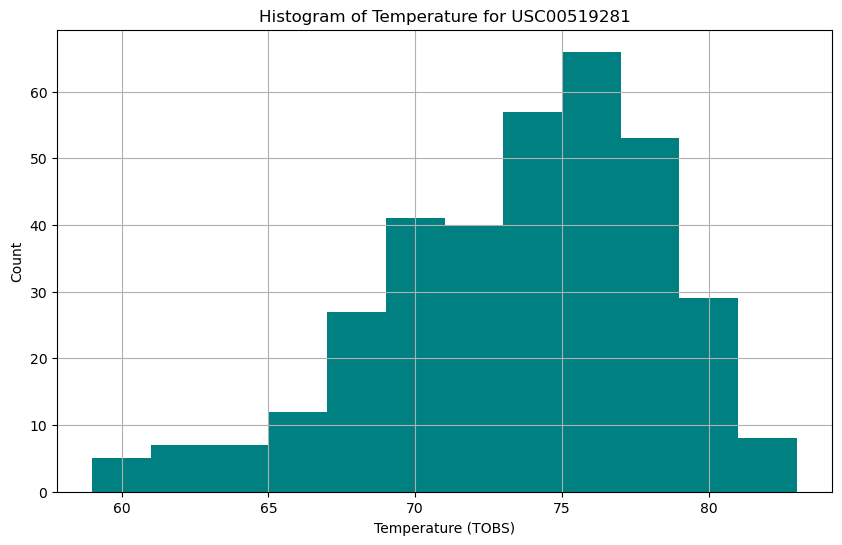

,Date,Station,TOBS
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


In [31]:
# Set the start date
start_date = datetime.date(2016, 8, 23)

# Perform a query to retrieve the data and tobs scores
results = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.asc()).\
    all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
dfa = pd.DataFrame(results, columns=["Date", "Station", "TOBS"])

# Convert 'Date' column to datetime
dfa["Date"] = pd.to_datetime(dfa['Date'])

# Sort the dataframe by date
dfa = dfa.sort_values(by="Date", ascending=True).reset_index(drop=True)

# Calculate the date one year from the last date in the dataset
last_date = dfa["Date"].iloc[-1]
one_year_from_last_date = last_date + pd.DateOffset(years=1)
print(f"One year from the last date in the dataset: {one_year_from_last_date.date()}")

# Plot a histogram of TOBS with the color "teal"
plt.figure(figsize=(10, 6))
plt.hist(dfa["TOBS"], bins=12, color="teal")
plt.xlabel("Temperature (TOBS)")
plt.ylabel("Count")
plt.title("Histogram of Temperature for USC00519281")
plt.grid(True)
plt.show()

# Display the first few rows of the dataframe
dfa.head()

# Close Session

In [18]:
# Close Session
session.close()
